In [4]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
train.head(2)
# weather 1-4 로 갈 수록 안좋아짐 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


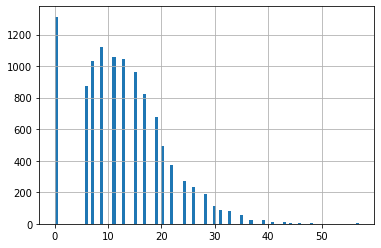

In [8]:
train['windspeed'].hist(bins=100)
# bins =50, 구간을 잘게 쪼개보면 값들이 더 잘 보인다 (0값이 많다!)

## eda
- q1. 0 값인 풍속 데이터를 어떻게 채울 수 있을까요?
- 2. 1시간 전 풍속 값의 평균으로 채워보세요

In [11]:
train['wind_lagged'] = (train.sort_values(by=['windspeed'], ascending=True)
                       .groupby(['windspeed'])['windspeed'].shift(1)) #window fuction lag 사용 

In [13]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,wind_lagged
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,NaN
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.0


In [15]:
train['wind_avg'] = train['wind_lagged'].mean()

In [16]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,wind_lagged,wind_avg
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,NaN,12.758447
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.0,12.758447
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.0,12.758447
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.0,12.758447
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.0,12.758447


In [18]:
# 선미님
train['wind_1'] = train['windspeed']
train['windspped_lag']=train['wind_1'].shift(1,fill_value=0) #fill_value = nan값을 채워주는 방법 
train['windspped_lead']=train['wind_1'].shift(-1,fill_value=0)

In [23]:
train['windspedd_mean_of_li'] = (train['windspped_lag'] + train['windspped_lead'])/2

In [26]:
(train['windspped_lag'] + train['windspped_lead'])/2

0         0.00000
1         0.00000
2         0.00000
3         0.00000
4         3.00160
           ...   
10881    19.50035
10882    20.50200
10883    10.50225
10884    11.99970
10885     3.00160
Length: 10886, dtype: float64

In [24]:
# replace 대신 0 값이 나오는 곳에 구했던 평균값 숫자들 적용(밀어넣기)
train.loc[train['wind_1']==0, 'wind_1'] = train.loc[train['wind_1']==0, 'windspedd_mean_of_li']
# train.loc[train['windspeed_v1'] == 0, 'windspeed_v1'] = train.loc[train['windspeed_v1'] == 0, 'windspeed_mean_of_ll']

In [25]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,wind_lagged,wind_avg,wind_1,windspped_lag,windspped_lead,windspedd_mean_of_li
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,NaN,12.758447,<bound method Series.mean of 0 0.0000\...,0.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.0,12.758447,<bound method Series.mean of 0 0.0000\...,0.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.0,12.758447,<bound method Series.mean of 0 0.0000\...,0.0,0.0,0.0


In [34]:
# 해당 날짜 풍속의 평균으로 0을 채워넣기 
# pandas 쓸 때는 for문 되도록 쓰지 말고 loc이랑 iloc 쓰기 
train['wind_2'] = train['windspeed']
train['datetime_date'] = pd.to_datetime(train['datetime']).dt.date

In [35]:
train['windspeed_date'] = train.groupby('datetime_date')['windspeed'].transform(lambda x:x.mean())
# grouby 후, windspped로 들어가서 transform 했음. 
# transform 은 groupby object에서다가 씀 (데이터를 파티션에 넣은 상태, 데이터 프레임이 아님)
# apply는 row별로 적용. 그러니까 데이터 프레임에 사용

In [36]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,windspped_lag,windspped_lead,windspedd_mean_of_li,wind_2,wind_lagged2,wind_lag2,wind_lead2,windspedd_mean_of_li2,datetime_date,windspeed_date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0.0,0.0,0.0,0.0,12.725631,0.0,0.0,0.0,2011-01-01,10.749871
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0.0,0.0,0.0,0.0,12.725631,0.0,0.0,0.0,2011-01-01,10.749871
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0.0,0.0,0.0,0.0,12.725631,0.0,0.0,0.0,2011-01-01,10.749871
